In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


(1365, 2048)


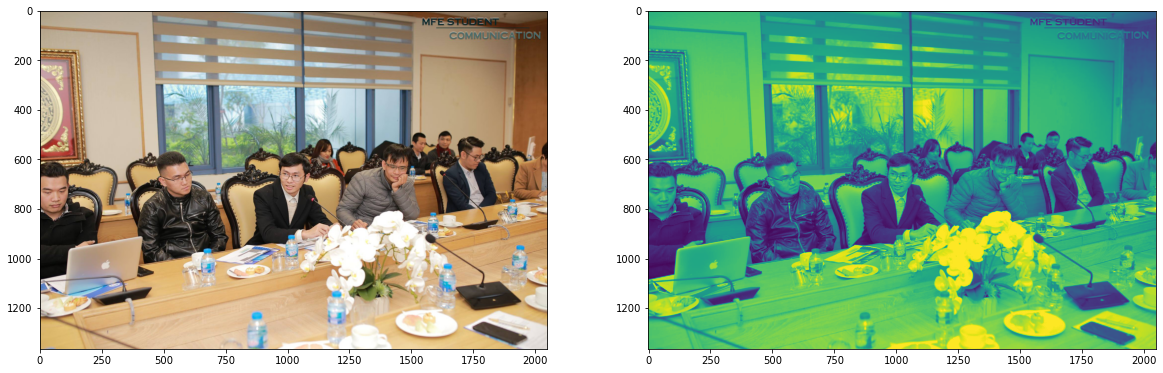

In [83]:
img = np.array(Image.open('pic2.jpeg'))
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(img)
#convert to gray
gray = img.dot([0.299, 0.5870, 0.114])
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(gray)
print(gray.shape)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


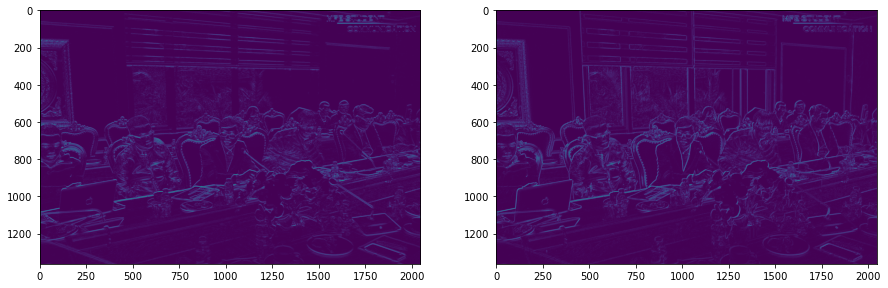

In [84]:
#Bo loc ngang
f_horizontal = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])
f_vertical = f_horizontal.T
f_cross = (f_vertical+f_horizontal)/2
print(f_vertical)
def conv2d(img, filter, stride = 1, padding = 0):
    f = filter.shape[0]
    w, h = img.shape
    w1, h1 = int((w+2*padding-f)/stride + 1), int((h+2*padding-f)/stride + 1)
    X = np.pad(img, padding, mode = 'constant', constant_values = 0)
    z = np.zeros((w1, h1))
    for i in range(w1):
        for j in range(h1):
            iw = j*stride
            ih = i*stride
            z[i,j] = np.abs(np.sum(X[ih:ih+f,iw:iw+f]*filter))
    return z
img1 = conv2d(gray, f_horizontal)
img2 = conv2d(gray, f_cross)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
